import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
# Załadowanie danych

In [2]:
df = pd.read_csv('../train_set.csv')

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<IPython.core.display.Javascript object>

In [3]:
df = df.rename(columns={"Unnamed: 0": "index"}).set_index("index")

In [23]:
#matplotlib inline

## Rozkłady

In [5]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [6]:
df = df[['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence', 'tempo', 'duration_ms']]

In [7]:
from sklearn.preprocessing import PowerTransformer

In [8]:
scaler = PowerTransformer()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

<IPython.core.display.Javascript object>

### Dla wszystkich obserwacji

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rozkład zmiennej track_popularity po przeskalowaniu')

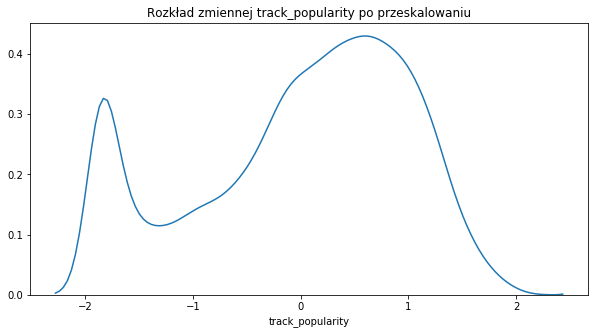

In [24]:
plt.figure(figsize = (10,5))
sns.distplot(df['track_popularity'], hist=False, bins = 25).set_title('Rozkład zmiennej track_popularity po przeskalowaniu')

Widać bardzo dużo obserwacji z popularnością w okolizach zera. Gdybyśmy chcieli tworzyć model w oparciu o tę zmienną lub chcieli przewidywać popularność piosenek, to musielibyśmy się temu przyjrzeć.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rozkład zmiennej danceability po przeskaluwaniu')

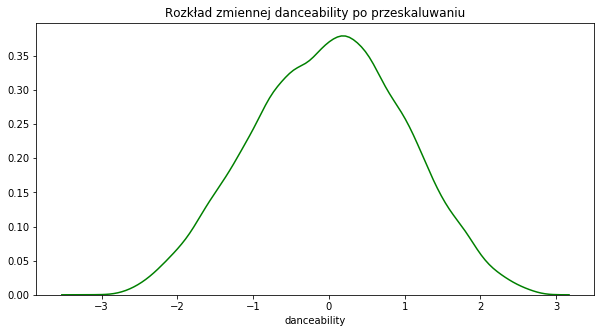

In [21]:
plt.figure(figsize = (10,5))
sns.distplot(df['danceability'], hist=False, bins = 25, color = 'green').set_title('Rozkład zmiennej danceability po przeskaluwaniu')

Widzimy, że rozkład jest lewostronny - większość obserwacji raczej nadaje się do tańca.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rozkład zmiennej energy po przeskalowaniu')

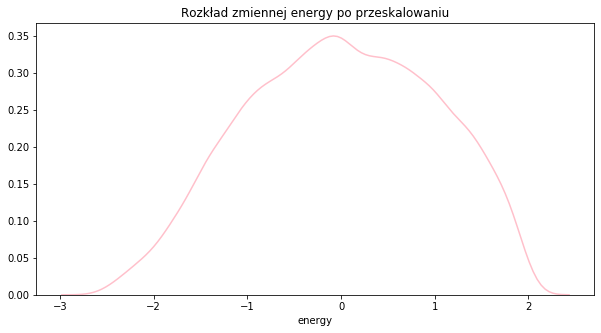

In [22]:
plt.figure(figsize = (10,5))
sns.distplot(df['energy'], hist=False, bins = 25, color = 'pink').set_title('Rozkład zmiennej energy po przeskalowaniu')

Tak jak przy taneczności - rozkład zmiennej energy jest lewostronny. Większość utworów jest raczej energetyczna.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rozkład zmiennej loudness po przeskalowaniu')

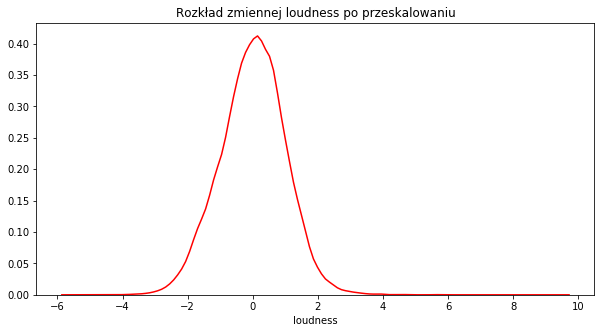

In [25]:
plt.figure(figsize = (10,5))
sns.distplot(df['loudness'], hist=False, bins = 30, color = 'red').set_title('Rozkład zmiennej loudness po przeskalowaniu')

Zmienna loudness przyjmuje wartości od -46 do 1,25. Zdecydowana większość obserwacji przyjmuje wartości w okolizach zera.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rozkład zmiennej speechiness po przeskalowaniu')

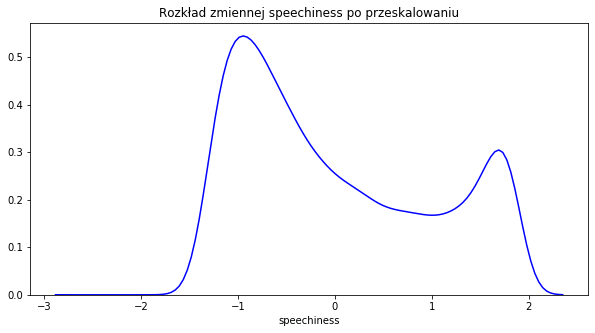

In [26]:
plt.figure(figsize = (10,5))
sns.distplot(df['speechiness'], hist=False, bins = 20, color = 'blue').set_title('Rozkład zmiennej speechiness po przeskalowaniu')

Powyższy wykres pokazuje, że zdecydowana większość utworów w zbiorze to piosenki w ponad 80% muzyczne (bez wokalu).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rozkład zmiennej acousticness po przeskalowaniu')

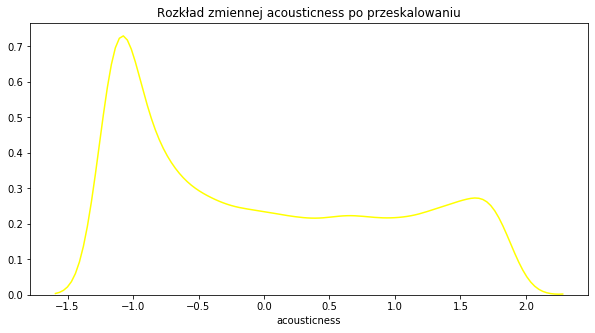

In [27]:
plt.figure(figsize = (10,5))
sns.distplot(df['acousticness'], hist=False, bins = 20, color = 'yellow').set_title('Rozkład zmiennej acousticness po przeskalowaniu')

Jeżeli dobrze rozumiem akustyczność, to z wykresu wynika, że zdecydowana większość piosenek to utwory elektroniczne, rockowe itd.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rozkład zmiennej instrumentalness po przeskalowaniu')

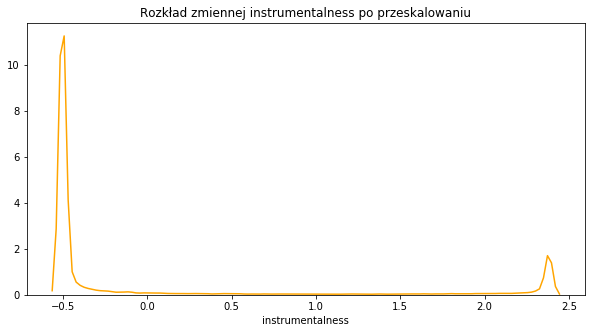

In [28]:
plt.figure(figsize = (10,5))
sns.distplot(df['instrumentalness'], hist=False, bins = 20, color = 'orange').set_title('Rozkład zmiennej instrumentalness po przeskalowaniu')

Zdecydowana większość zmiennych jest blisko zera. Zgodnie z opisem zmiennej instrumentalness - kawałki rapowe są traktowane w 100% jako vocal i to może być przyczyną takiego rozkładu.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rozkład zmiennej liveness po przeskalowaniu')

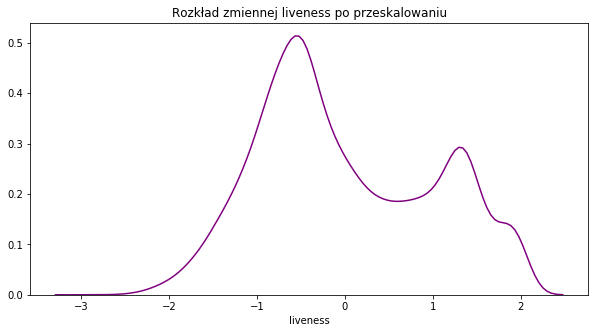

In [29]:
plt.figure(figsize = (10,5))
sns.distplot(df['liveness'], hist=False, bins = 25, color = 'purple').set_title('Rozkład zmiennej liveness po przeskalowaniu')

Jak można było się spodziewać - zdecydowana większośc utworów została nagrana w studiach.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rozkład zmiennej valence po przeskalowaniu')

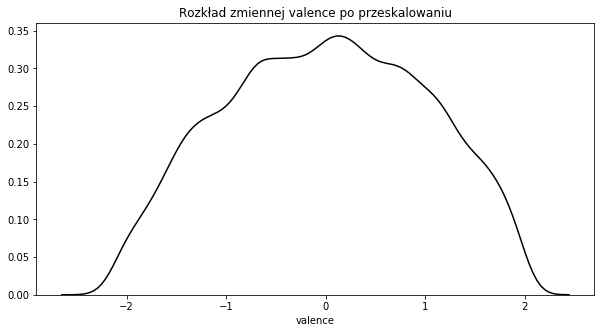

In [30]:
plt.figure(figsize = (10,5))
sns.distplot(df['valence'], hist=False, bins = 15, color = 'black').set_title('Rozkład zmiennej valence po przeskalowaniu')

Zmienna valence opisuje coś w stylu ładunku emocjonalnego jaki wywołuje dana piosenka. Rozkład jest bardzo zbliżony do normalnego co oznacza, że większośc piosenek wywołuje neutralne emocje.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rozkład zmiennej tempo po przeskalowaniu')

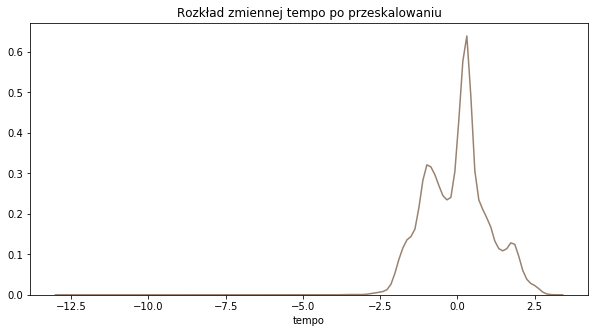

In [31]:
plt.figure(figsize = (10,5))
sns.distplot(df['tempo'], hist=False, bins = 20, color = '#988270').set_title('Rozkład zmiennej tempo po przeskalowaniu')

Większość piosenek posiada ciut ponad 100 beatów na minutę

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rozkład zmiennej duration_ms po przeskalowaniu')

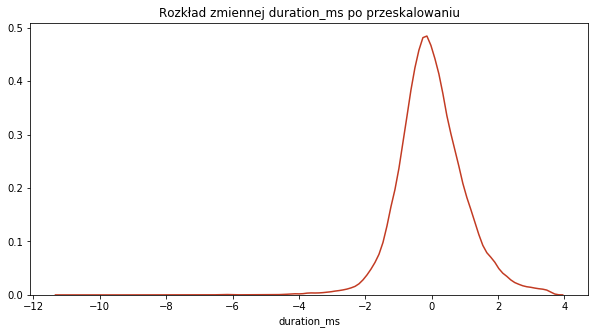

In [32]:
plt.figure(figsize = (10,5))
sns.distplot(df['duration_ms'], hist=False, bins = 30, color = '#C23B23').set_title('Rozkład zmiennej duration_ms po przeskalowaniu')

Rozkład czasu trwania piosenek jest zbliżony do normalnego (lekko prawostronny). Najwięcej piosenek trwa ok 200000 milisekund.

In [20]:
200000/1000/60

3.3333333333333335